<a href="https://colab.research.google.com/github/carlolopez03/Prediction-of-Product-Sales/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**


## **Project Overview**

**Data Dictionary**

Item_Identifier	= Product ID

Item_Weight =	Weight of product

Item_Fat_Content	= Whether the product is low-fat or regular

Item_Visibility	= The percentage of total display area of all products in a store allocated to the particular product

Item_Type =	The category to which the product belongs

Item_MRP =	Maximum Retail Price (list price) of the product

Outlet_Identifier =	Store ID

Outlet_Establishment_Year =	The year in which store was established

Outlet_Size	= The size of the store in terms of ground area covered

Outlet_Location_Type = The type of area in which the store is located

Outlet_Type	= Whether the outlet is a grocery store or some sort of supermarket

Item_Outlet_Sales =	Sales of the product in the particular store. This is the target variable to be predicted.

## **Load and Inspect Data**

In [ ]:
#Imports
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


#Loading Data
file = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Inspecting data
df.info()
print("\nMissing Values:", df.isna().sum().sum())
print("\nDuplicated Rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Missing Values: 3873

Duplicated Rows: 0


In [ ]:
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns in the dataframe")

There is 8523 rows and 12 columns in the dataframe


## **Clean Data**

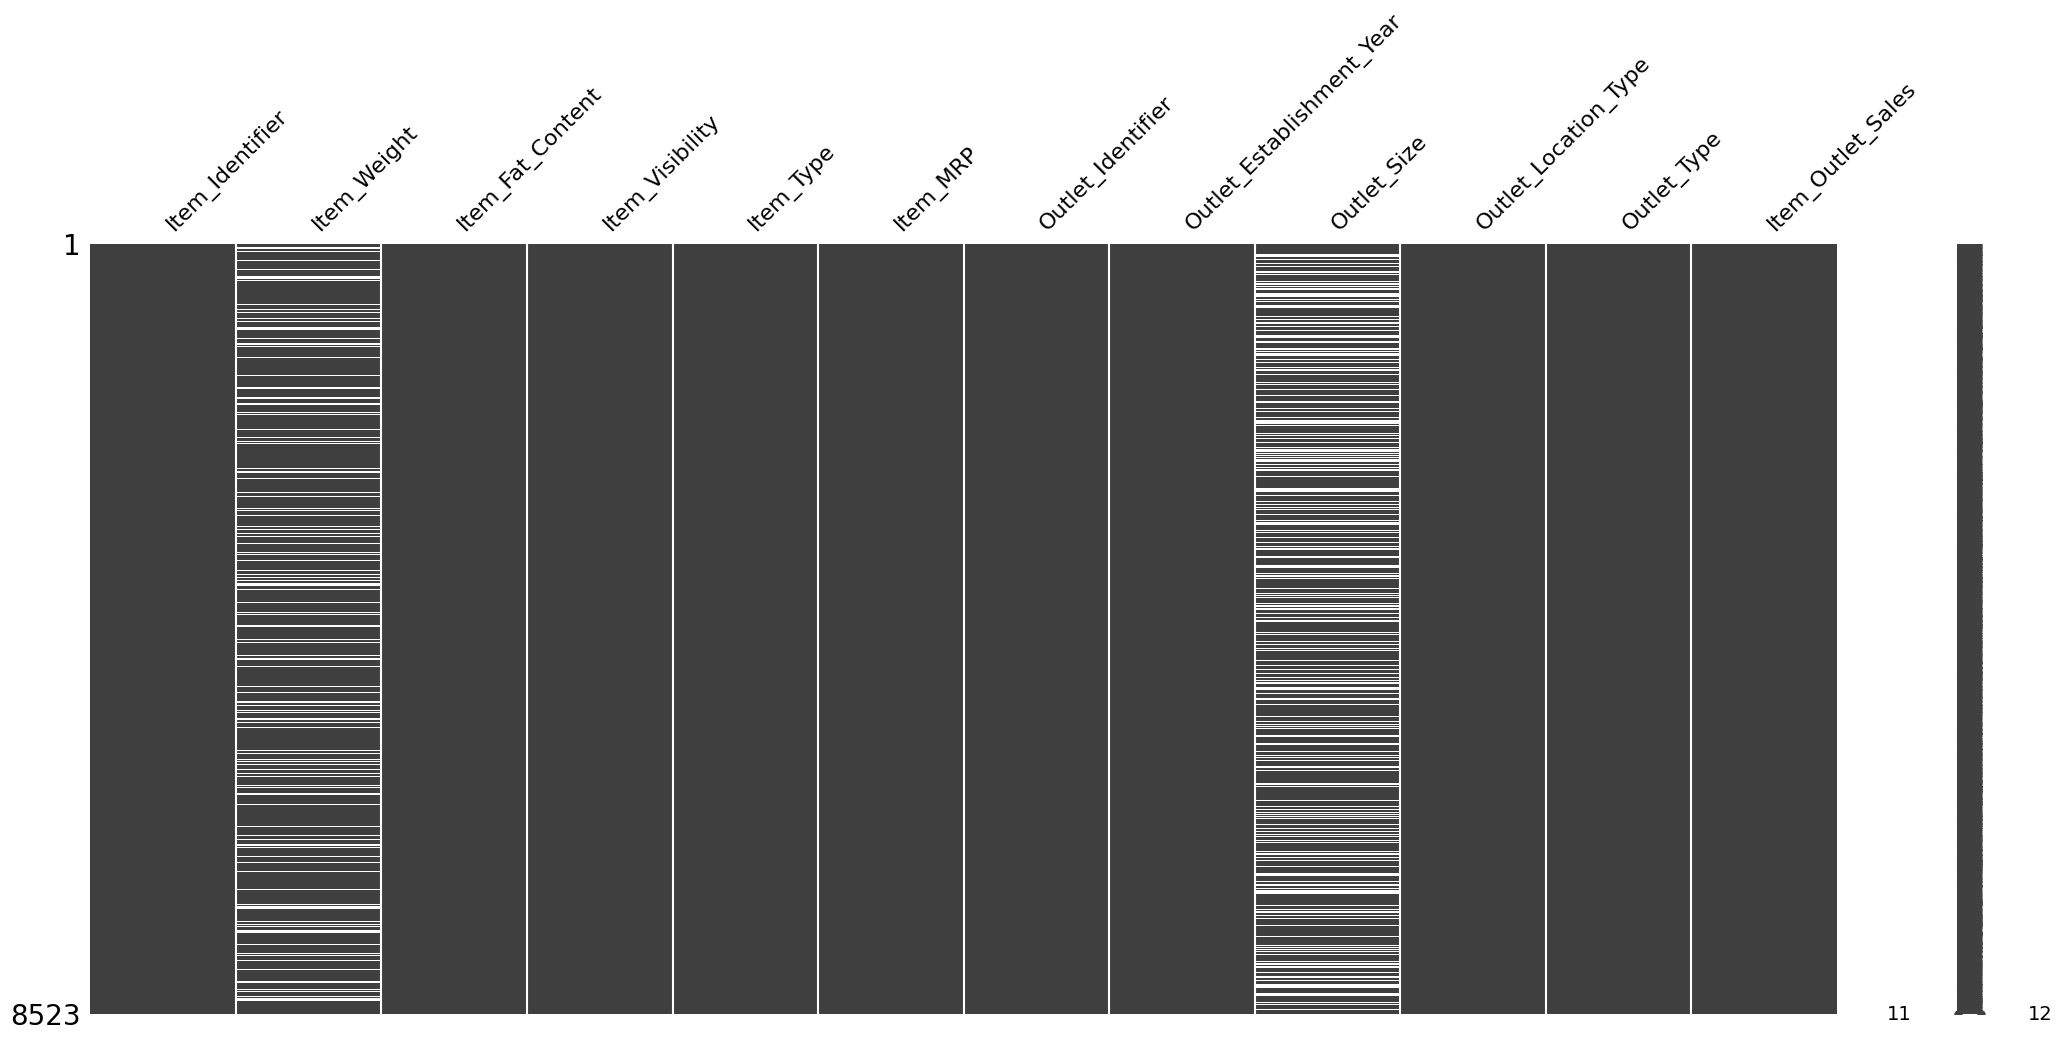

In [ ]:
#Identifying missing values
msno.matrix(df);

In [ ]:
#Percent of missing values
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

In [ ]:
#Addressing missing values for Outlet Size
df['Outlet_Size'] = df['Outlet_Size'].fillna('Missing')
df["Item_Weight"] = df["Item_Weight"].fillna(-1)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Checking for inconsistent columns
# Identify string columns
string_cols = df.select_dtypes("object").columns
# Obtaining value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value Counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

- The item fat content column hasx incosistent values. I will replace these values

In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat','reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## **Exploratory Data Analysis**

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.describe(exclude='number')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


In [ ]:
corr = df.corr(numeric_only=True);
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


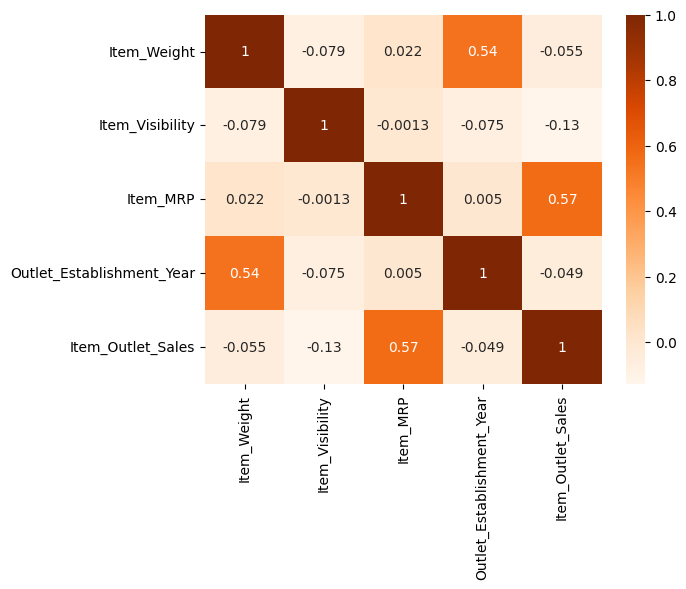

In [ ]:
sns.heatmap(corr, cmap = 'Oranges', annot=True);

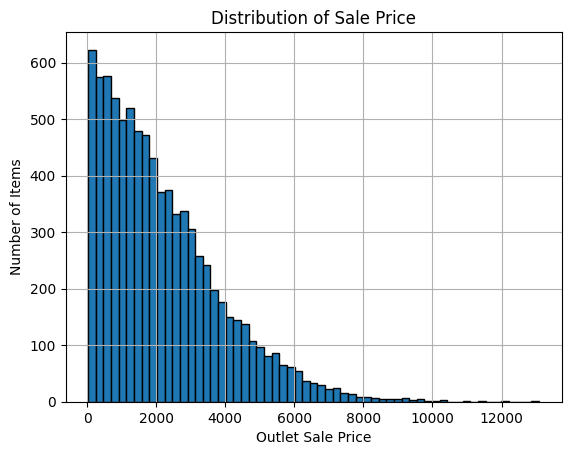

In [ ]:
ax = df['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Sale Price')
ax.set_xlabel('Outlet Sale Price')
ax.set_ylabel('Number of Items');


- Our histogram plots shows us that the outlet sale price column has a long skew meaning there are outliers in the column. I will explore the outlet sales price more with a box plot to identify outliers and comparing it to different store types to see which type of store performs the best

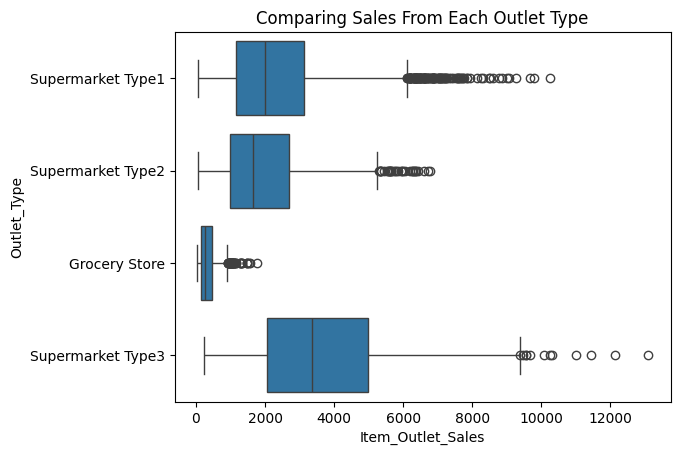

In [ ]:
ax =sns.boxplot(data=df, x='Item_Outlet_Sales', y='Outlet_Type')
ax.set_title('Comparing Sales From Each Outlet Type');


- Super market type 3 makes the most sales out of the 4 with least amount outliers.
- Super market type 1 is runner up in sales but has the most amount of outliers.
- Grocery stores don't perform as well as super markets when it come to sales.

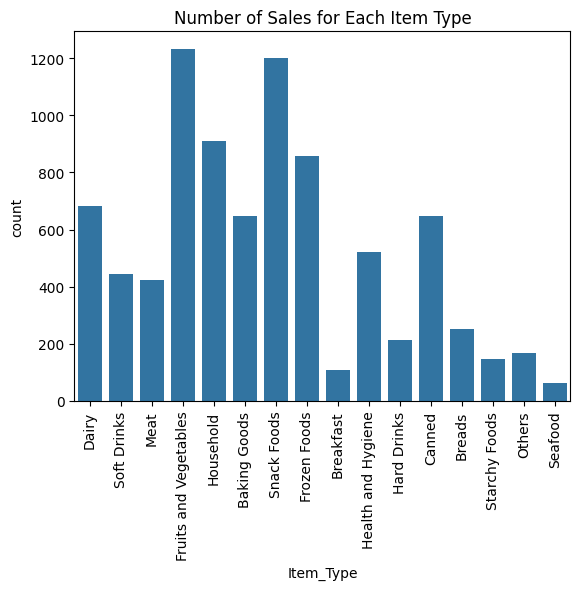

In [ ]:
ax = sns.countplot(data=df, x='Item_Type')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Sales for Each Item Type');

- Fruit and Vegetables, and Snacks are the most bought items.

## **Feature Inspection**

In [ ]:
num_null_filter = df['Item_Weight'] < 0
num_null_filter.sum()

1463

In [ ]:
df.loc[num_null_filter,'Item_Weight'] = np.nan
num_null_filter = df['Item_Weight'] < 0
num_null_filter.sum()

0

In [ ]:
cat_null_filter = df['Outlet_Size'].str.contains('Missing')
cat_null_filter.sum()

2410

In [ ]:
cat_null_filter

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
df.loc[cat_null_filter,'Outlet_Size'] = np.nan
cat_null_filter = df['Outlet_Size'].str.contains('Missing')
cat_null_filter.sum()

0

### ***Categorical Features***

In [ ]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  if nunique > 10:
    print(f"- [!] Warning: '{x}' has high cardinality and should consider being dropped.")
  else:
    print("- No high cardinality.")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [ ]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

***Item_Type***

 The category to which the product belongs

<ipython-input-22-6a746be3a617>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


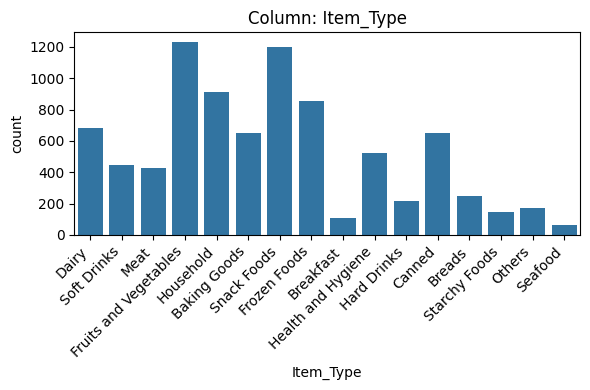

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- [!] Warning: 'Item_Type' has high cardinality and should consider being dropped.
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'Item_Type');

This column is a nominal feature

***Is there a business case/understanding reason to exclude based on our business case?***
- The feature may have high cardinality but it will help predict the sales price.

<ipython-input-23-2426c16495e5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


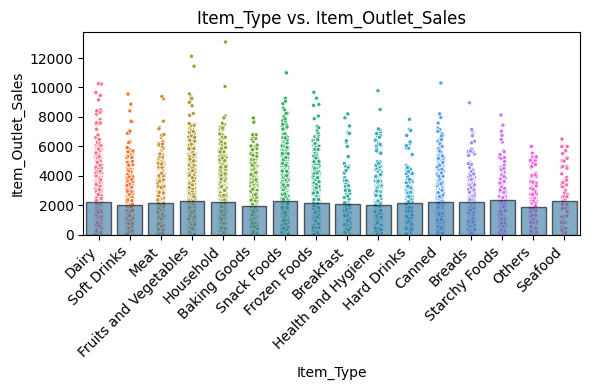

In [ ]:
plot_categorical_vs_target(df, 'Item_Type');

***Item_Fat_Content***

 Whether the product is low-fat or regular

<ipython-input-22-6a746be3a617>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


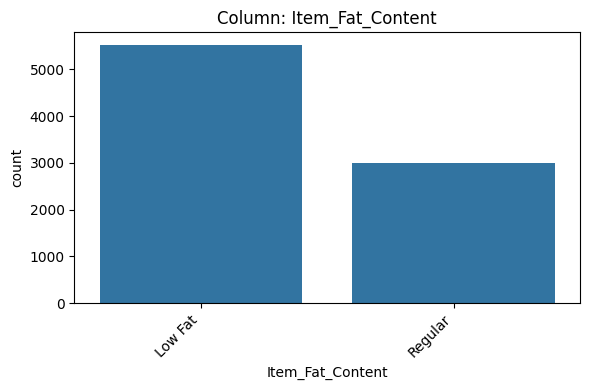

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- No high cardinality.
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'Item_Fat_Content');

This column is a nominal feature

***Is there a business case/understanding reason to exclude based on our business case?***
- No, this can help us predict prices on different items

<ipython-input-23-2426c16495e5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


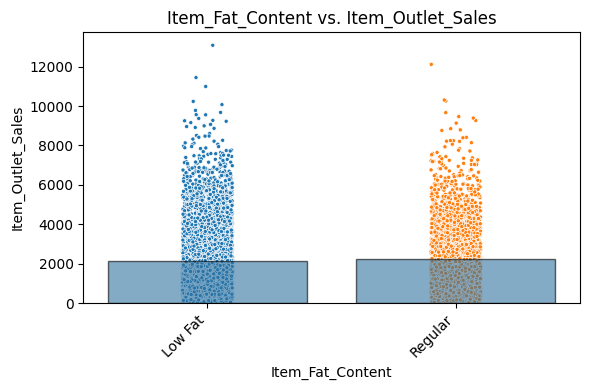

In [ ]:
plot_categorical_vs_target(df, 'Item_Fat_Content');

***Outlet_Identifier***

Store ID

<ipython-input-22-6a746be3a617>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


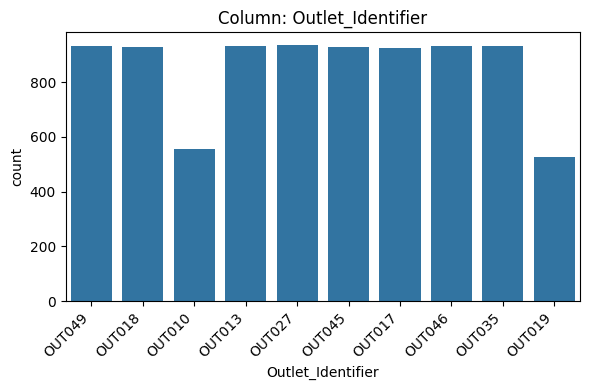

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- No high cardinality.
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'Outlet_Identifier'	);

***Is there a business case/understanding reason to exclude based on our business case?***
- Yes, this column consists of id for the outlets not relevent to the items.

<ipython-input-23-2426c16495e5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


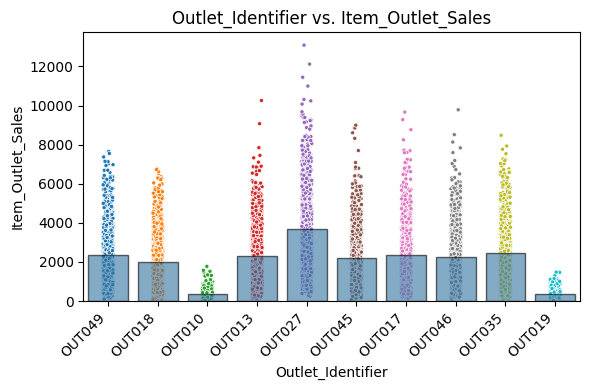

In [ ]:
plot_categorical_vs_target(df, 'Outlet_Identifier');

***Outlet_Size***

 The size of the store in terms of ground area covered

<ipython-input-22-6a746be3a617>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


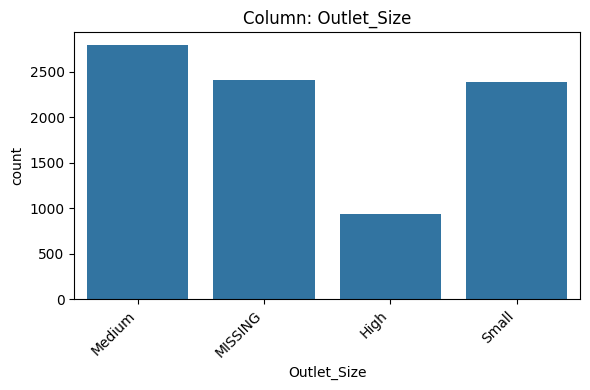

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- No high cardinality.
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'Outlet_Size');


This column is an ordinal feature.

***Is there a business case/understanding reason to exclude based on our business case?***
- No, depending on the outlet size this can show us where people buy from the most.

<ipython-input-23-2426c16495e5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


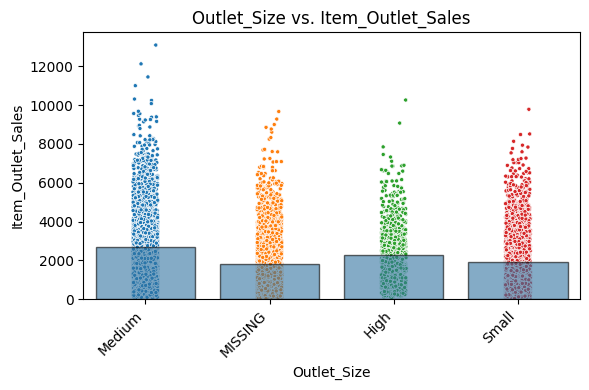

In [ ]:
plot_categorical_vs_target(df, 'Outlet_Size');

***Outlet_Location_Type***

 The type of area in which the store is located

<ipython-input-22-6a746be3a617>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


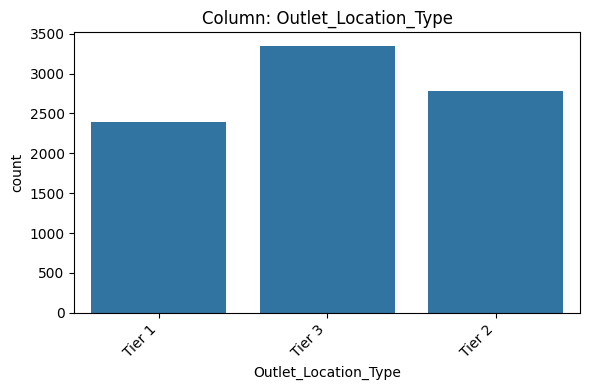

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- No high cardinality.
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'Outlet_Location_Type');

This column is an ordinal feature.

***Is there a business case/understanding reason to exclude based on our business case?***
- No for the same reason as outlet size

<ipython-input-23-2426c16495e5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


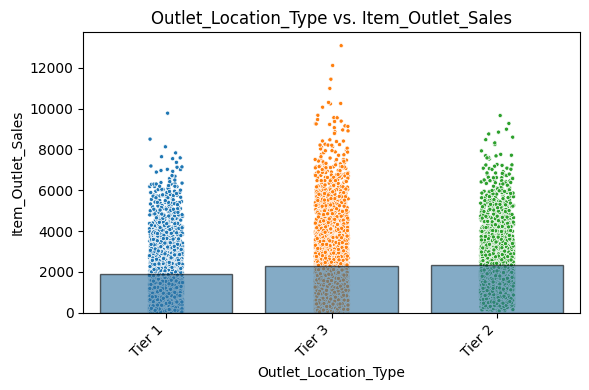

In [ ]:
plot_categorical_vs_target(df, 'Outlet_Location_Type');

***Outlet_Type***

 Whether the outlet is a grocery store or some sort of supermarket

<ipython-input-22-6a746be3a617>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


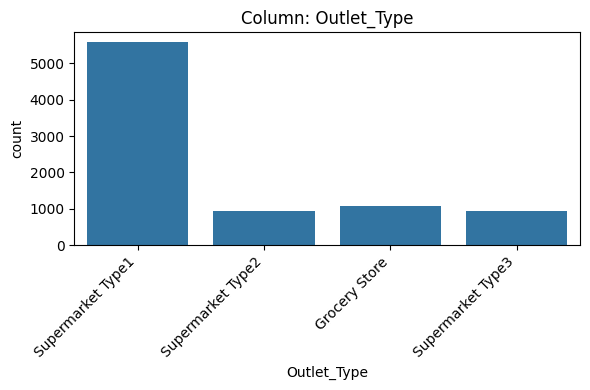

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- No high cardinality.
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'Outlet_Type');

This column is a nominal feature

***Is there a business case/understanding reason to exclude based on our business case?***
- No for the same reason as outlet size and outlet location type.

<ipython-input-23-2426c16495e5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


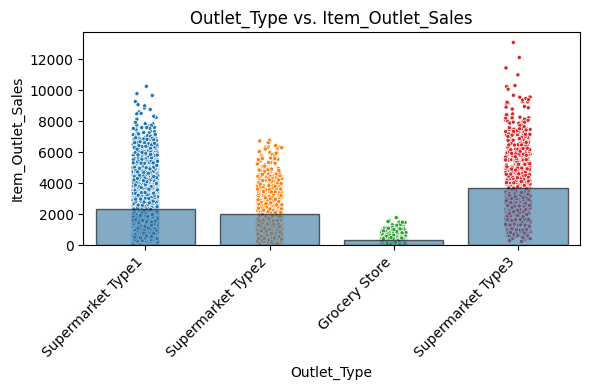

In [ ]:
plot_categorical_vs_target(df, 'Outlet_Type');

### Numerical Features

In [ ]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  if nunique > 10:
    print(f"- [!] Warning: '{x}' has high cardinality and should consider being dropped.")
  else:
    print("- No high cardinality.")
  # First find value counts of feature
  val_counts = df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [ ]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax


***Item_Weight***

 Weight of product

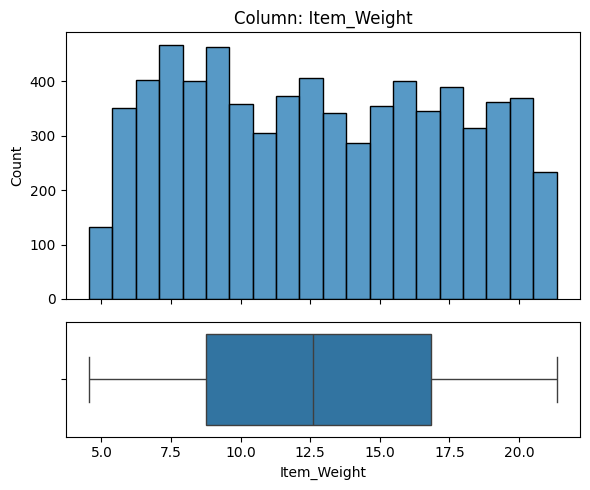

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- [!] Warning: 'Item_Weight' has high cardinality and should consider being dropped.
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, 'Item_Weight');

***Is there a business case/understanding reason to exclude based on our business case?***
- Yes, because different items can weigh the same but will not be worth the same. This makes it difficult for our model to learn.

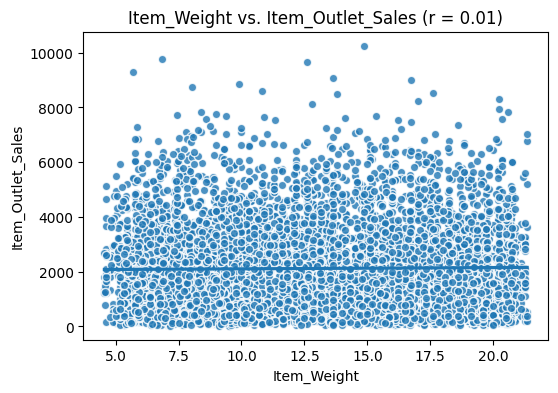

In [ ]:
plot_numeric_vs_target(df, 'Item_Weight');

***Item_Visibility***

 The percentage of total display area of all products in a store allocated to the particular product

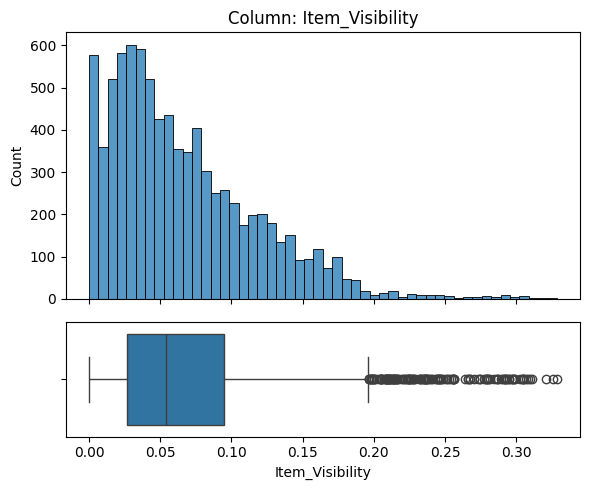

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- [!] Warning: 'Item_Visibility' has high cardinality and should consider being dropped.
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, 'Item_Visibility');

***Is there a business case/understanding reason to exclude based on our business case?***
- No, this can help us see which products are more popular.

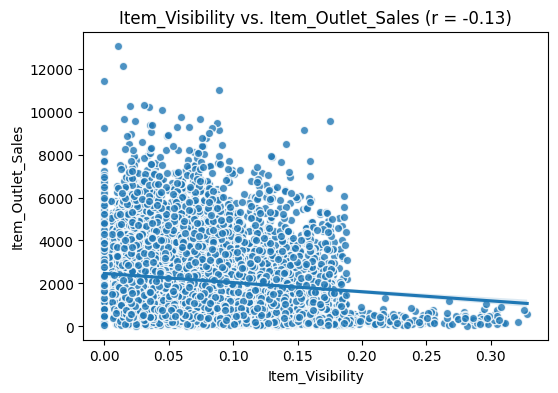

In [ ]:
plot_numeric_vs_target(df, 'Item_Visibility');

***Item_MRP***

Maximum Retail Price (list price) of the product

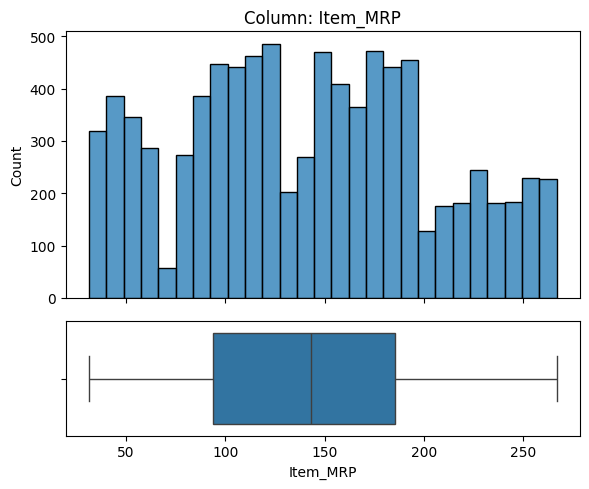

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- [!] Warning: 'Item_MRP' has high cardinality and should consider being dropped.
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, 'Item_MRP');

***Is there a business case/understanding reason to exclude based on our business case?***
- No, this column can help us make predictions.

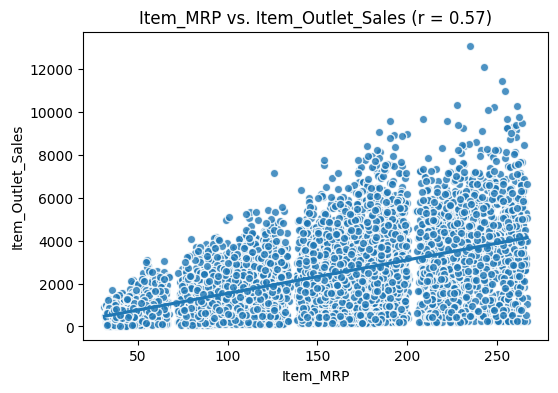

In [ ]:
plot_numeric_vs_target(df, 'Item_MRP');

***Outlet_Establishment_Year***

 The year in which store was established

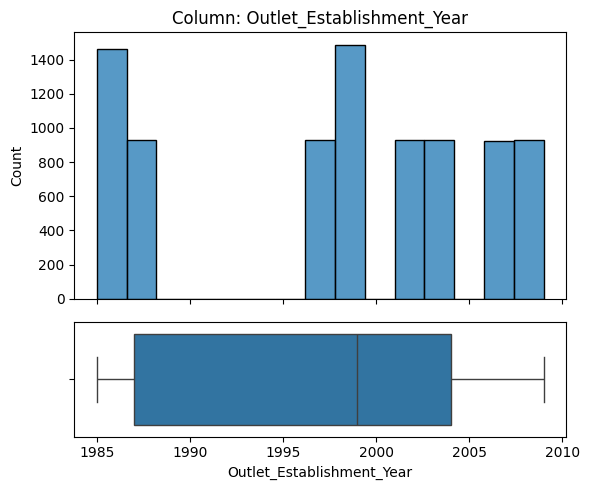

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- No high cardinality.
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, 'Outlet_Establishment_Year');

***Is there a business case/understanding reason to exclude based on our business case?***
- Yes the years won't help predict the target because of all the gaps.

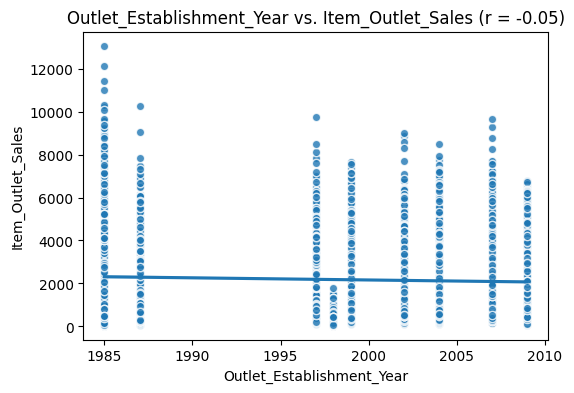

In [ ]:
plot_numeric_vs_target(df, 'Outlet_Establishment_Year');

***Item_Outlet_Sales***

 Sales of the product in the particular store. This is the target variable to be predicted.

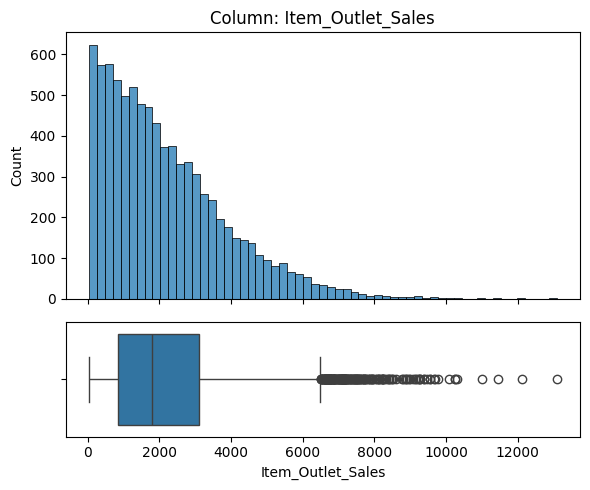

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- [!] Warning: 'Item_Outlet_Sales' has high cardinality and should consider being dropped.
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, 'Item_Outlet_Sales');

***Is there a business case/understanding reason to exclude based on our business case?***


- Yes, its our target!

#**Machine Learning**.,,     ,.fk.,

In [ ]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

#Reloading data

df2 = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv')
df2.head()

In [ ]:
#Looking for duplicates
df2.duplicated().sum()

In [ ]:
#Looking for missing values
df2.isna().sum()

In [ ]:
df2.drop(columns = 'Item_Weight', axis = 1, inplace=True)
df2.drop(columns = 'Outlet_Size', axis = 1, inplace=True)
df2.info()

In [ ]:
#Fixing incosistent categories
data_types = df2.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df2['Item_Fat_Content'] = df_sp['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat','reg': 'Regular'})
df2['Item_Fat_Content'].value_counts()

In [ ]:
df_sp['Item_Fat_Content'] = df_sp['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat','reg': 'Regular'})
df_sp['Item_Fat_Content'].value_counts()

In [ ]:
numeric_tuple = ('numeric',num_pipeline,num_cols)
numeric_tuple

In [ ]:
ordinal_cols = ['Item_Fat_Content', 'Outlet_Location_Type']
fat_list = ['Low Fat', 'Regular']
loc_type_list = ['Tier 1', 'Tier 2', 'Tier 3']

ord = OrdinalEncoder(categories=[fat_list, loc_type_list])
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler2 = StandardScaler()

ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)
ord_pipeline

In [ ]:
numeric_tuple = ('numeric',num_pipeline,num_cols)
ord_tuple

In [ ]:
#Nominal
nominal_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

nom_pipeline = make_pipeline(missing_imputer, ohe)
nom_pipeline

In [ ]:
ohe_tuple = ('categorical', nom_pipeline, nominal_cols)
ohe_tuple